In [3]:
#This is a Free Code Camp Project that analzyes data from the 1994 consenus database. Below are the following questions that must be answered to recieve credit for the project.
'''
* How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index labels. (`race` column)
* What is the average age of men?
* What is the percentage of people who have a Bachelor's degree?
* What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
* What percentage of people without advanced education make more than 50K?
* What is the minimum number of hours a person works per week?
* What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?
* What country has the highest percentage of people that earn >50K and what is that percentage?
* Identify the most popular occupation for those who earn >50K in India. 
'''


"\n* How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index labels. (`race` column)\n* What is the average age of men?\n* What is the percentage of people who have a Bachelor's degree?\n* What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?\n* What percentage of people without advanced education make more than 50K?\n* What is the minimum number of hours a person works per week?\n* What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?\n* What country has the highest percentage of people that earn >50K and what is that percentage?\n* Identify the most popular occupation for those who earn >50K in India. \n"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

con_data = pd.read_csv('adult.data.csv')

In [5]:
#Get all columns as to understand what data was collected
print(con_data.columns)
print(con_data.head())
print(con_data.dtypes)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Ma

In [6]:
#How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index labels. (`race` column)
print(con_data['race'].value_counts())

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64


In [7]:
#What is the average age of men?
male_data = con_data[con_data['sex']=='Male'] 
print(male_data['age'].mean())

39.43354749885268


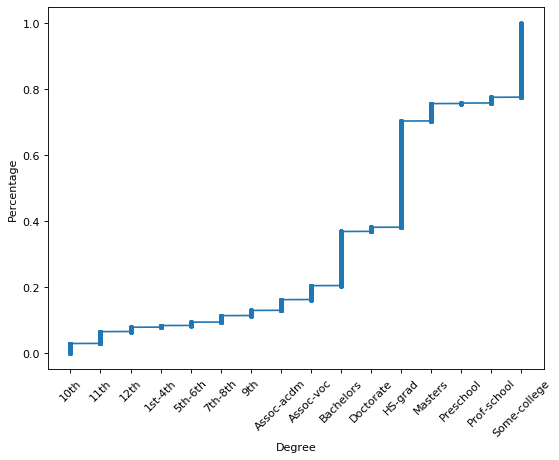

In [8]:
#What is the percentage of people who have a Bachelor's degree?
#Created a ECDF to plot the answer for this
x = np.sort(con_data['education'])
y = np.arange(1,len(x)+1)/len(x)
figure(figsize=(8, 6), dpi=80)
plt.xlabel('Degree')
plt.ylabel('Percentage')
plt.xticks(rotation = 45)
plt.plot(x,y,marker='.')
#Roughly 40% of all people in the survey have a bachlors degree.


In [9]:
#What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
edu_data = con_data[con_data['education'].isin(['Masters','Bachelors','Doctorate'])]

print(edu_data['salary'].value_counts().index.tolist())
salary_totals = edu_data['salary'].value_counts().tolist()

edu_income_percent = (salary_totals[1]/(salary_totals[0]+salary_totals[1])) *100
print(edu_income_percent)

['<=50K', '>50K']
46.535843011613935


In [10]:
#What percentage of people without advanced education make more than 50K?
no_adv_data = con_data[con_data['education'].isin(['Masters','Bachelors','Doctorate']) == False]

print(no_adv_data['salary'].value_counts().index.tolist())
no_adv_sal = no_adv_data['salary'].value_counts().tolist()
print(no_adv_sal)

no_adv_per = (no_adv_sal[1] / (no_adv_sal[0]+no_adv_sal[1]) ) * 100
print(no_adv_per)

['<=50K', '>50K']
[20715, 4355]
17.3713601914639


In [11]:
#What is the minimum number of hours a person works per week?
print(con_data['hours-per-week'].min())

1


In [18]:
#What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?
min_hours_data = con_data[con_data['hours-per-week'] == 1]
print(min_hours_data['salary'].value_counts())
print((2/20) *100)

<=50K    18
>50K      2
Name: salary, dtype: int64
10.0


In [34]:
#What country has the highest percentage of people that earn >50K and what is that percentage?
high_salary_data = con_data[con_data['salary']== '>50K']
#print(high_salary_data['native-country'].value_counts()) 
high_salary_list = high_salary_data['native-country'].value_counts().tolist()
print((high_salary_list[0]/sum(high_salary_list)) * 100)
print("United States")

91.45517153424308
United States


In [31]:
#Identify the most popular occupation for those who earn >50K in India. 
india_data= con_data[(con_data['salary'] == ">50K") & (con_data['native-country'] == "India") ]
print(india_data['occupation'].value_counts().index.tolist()[0])

Prof-specialty
